<a href="https://colab.research.google.com/github/rose453/Customer-assistant-chatbot/blob/main/Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
from google.colab import files
uploaded =files.upload()

Saving diabetes (1) (1) (2).csv to diabetes (1) (1) (2) (1).csv


In [18]:
diabetes = pd.read_csv('diabetes (1) (1) (2).csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [20]:
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [21]:
diabetes.shape


(768, 9)

In [22]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [24]:
diabetes.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [25]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: >

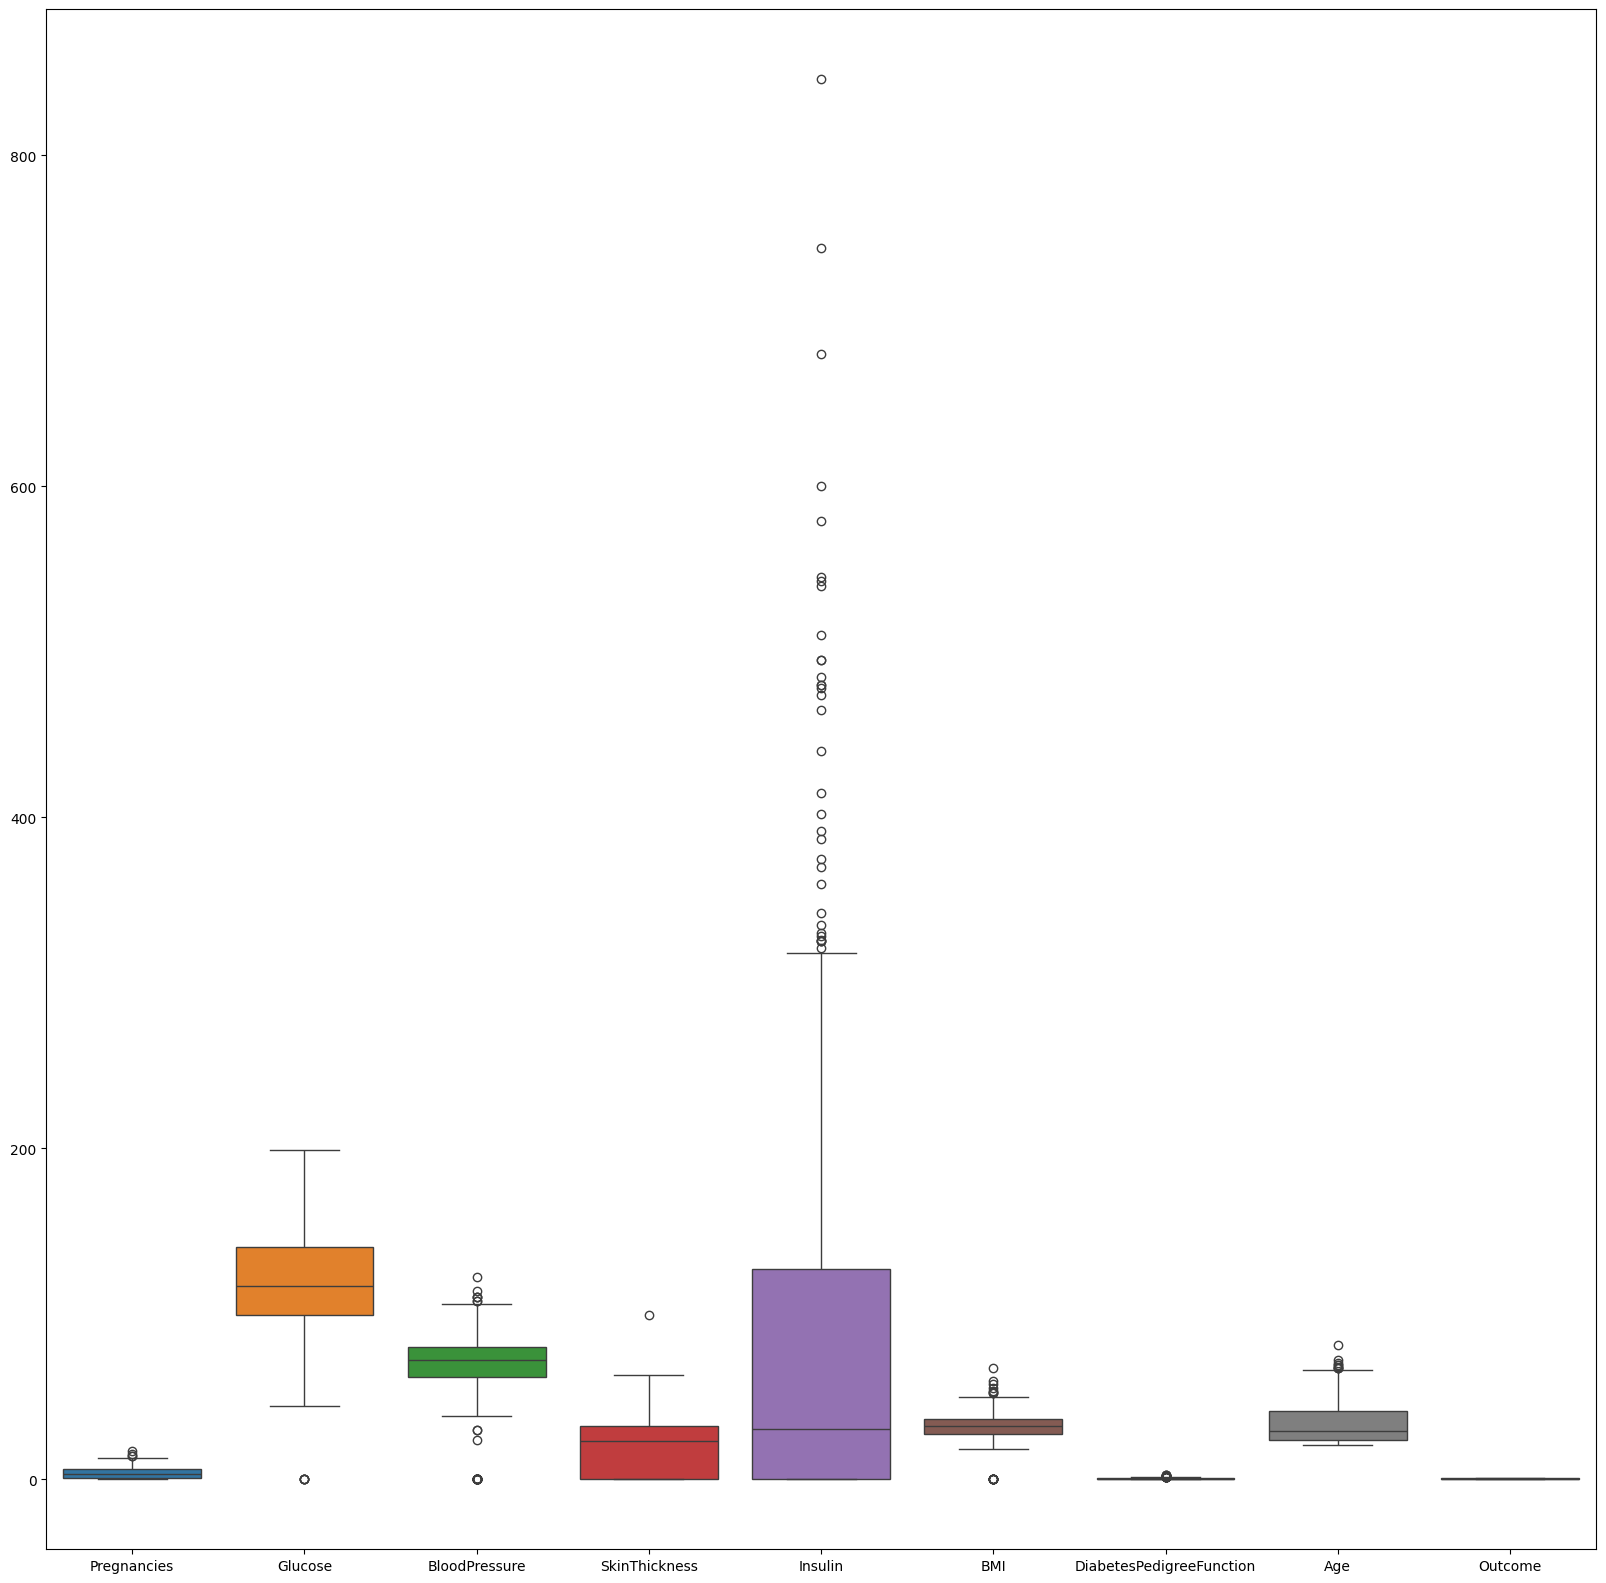

In [28]:
fig,ax = plt.subplots(figsize=(20,20))
sns.boxplot(data=diabetes,ax=ax)

In [32]:
Q1 =diabetes.quantile(0.25)
Q3 =diabetes.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
mask =~((diabetes < lower_bound) | (diabetes > upper_bound)).any(axis=1)
cleaned_data = diabetes[mask]

In [33]:
cleaned_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [34]:
cleaned_data.shape

(639, 9)

<Axes: >

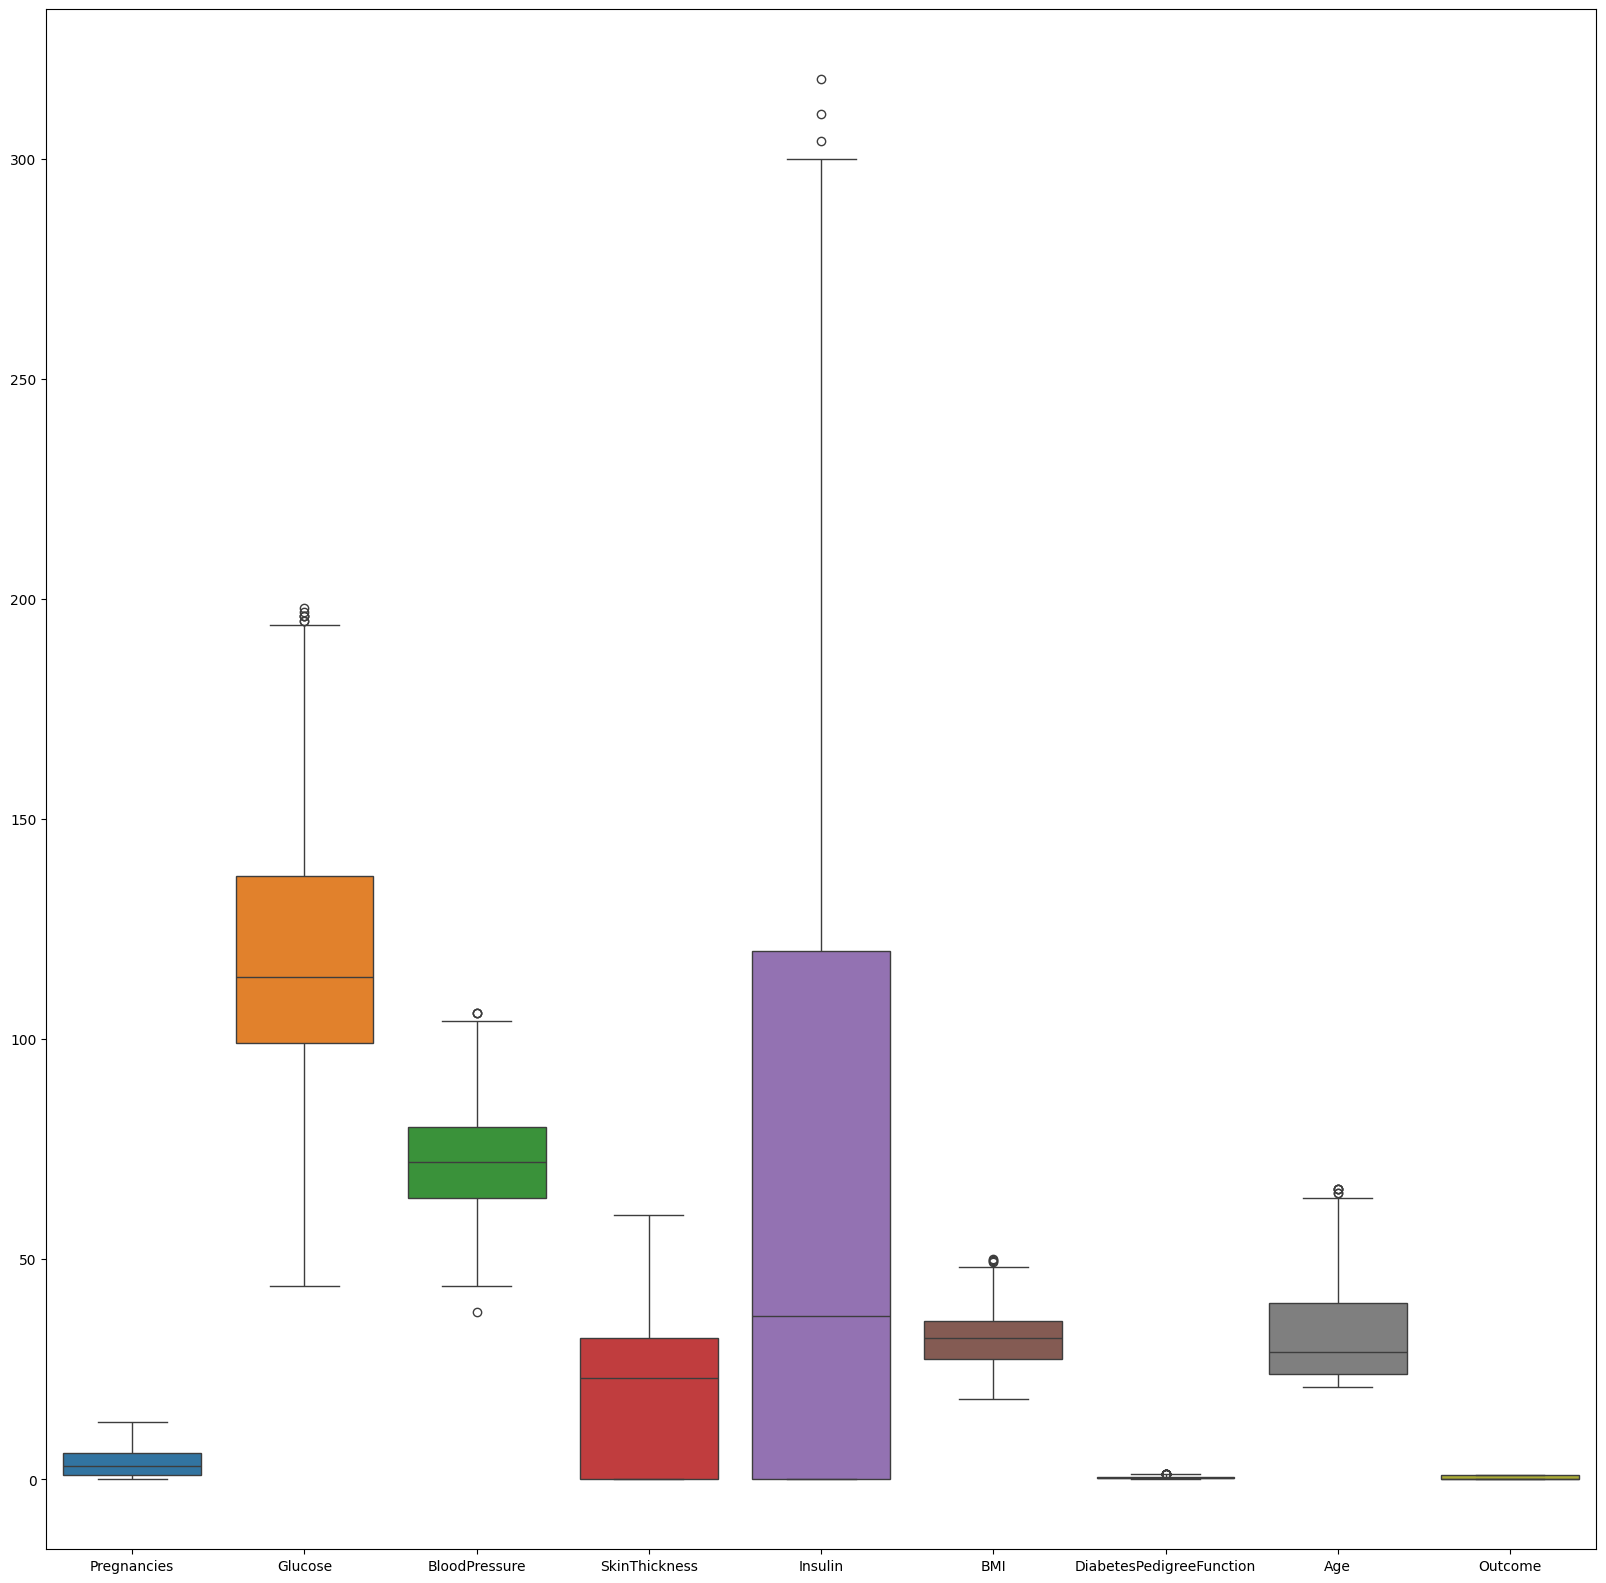

In [35]:
fig,ax = plt.subplots(figsize=(20,20))
sns.boxplot(data=cleaned_data,ax=ax)

In [38]:
correlation = cleaned_data.corr()

In [39]:
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.142093,0.210666,-0.094425,-0.114510,0.036958,0.009289,0.567438,0.227987
Glucose,0.142093,1.000000,0.238754,-0.004609,0.248225,0.192504,0.066530,0.286682,0.492740
BloodPressure,0.210666,0.238754,1.000000,0.037388,-0.041513,0.303301,0.024290,0.354036,0.183298
SkinThickness,-0.094425,-0.004609,0.037388,1.000000,0.487566,0.390340,0.148486,-0.143376,0.030676
Insulin,-0.114510,0.248225,-0.041513,0.487566,1.000000,0.188635,0.213191,-0.089535,0.097746
BMI,0.036958,0.192504,0.303301,0.390340,0.188635,1.000000,0.144757,0.063370,0.269371
DiabetesPedigreeFunction,0.009289,0.066530,0.024290,0.148486,0.213191,0.144757,1.000000,0.030081,0.179072
Age,0.567438,0.286682,0.354036,-0.143376,-0.089535,0.063370,0.030081,1.000000,0.263344
Outcome,0.227987,0.492740,0.183298,0.030676,0.097746,0.269371,0.179072,0.263344,1.000000


<Axes: >

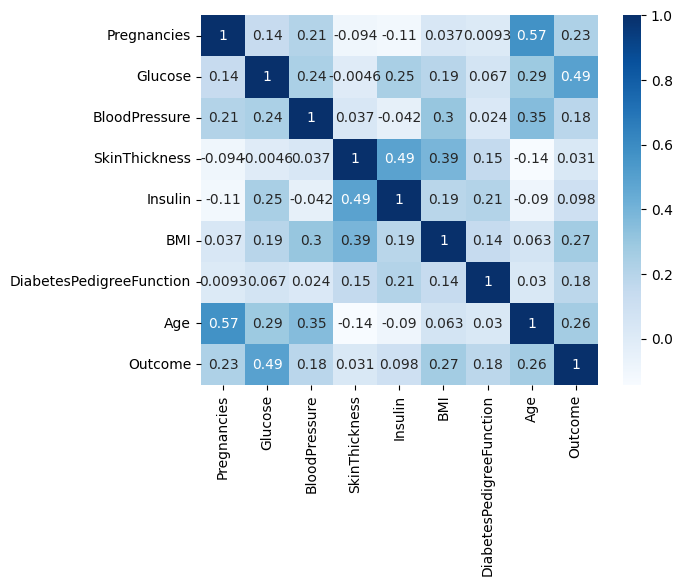

In [45]:
sns.heatmap(correlation,annot=True,cbar=True,cmap='Blues',annot_kws={'size':10})

In [41]:
cleaned_data["Outcome"].value_counts()

,count
Outcome,
0,439
1,200


In [42]:
x=cleaned_data.drop(columns="Outcome",axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [46]:
y=cleaned_data["Outcome"]
y

,Outcome
0,1
1,0
2,1
3,0
5,0
...,...
763,0
764,0
765,0
766,1


In [47]:
from imblearn.over_sampling import SMOTE

In [48]:
smote = SMOTE()
x_resampled,y_resampled = smote.fit_resample(x,y)

In [49]:
x_resampled.shape

(878, 8)

In [50]:
y_resampled.shape

(878,)

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x_resampled,y_resampled, test_size=0.3, random_state= 42)

In [53]:
x_resampled.shape,x_train.shape,x_test.shape, y_resampled.shape, y_test.shape, y_train.shape

((878, 8), (614, 8), (264, 8), (878,), (264,), (614,))

In [54]:
model= LogisticRegression()

In [55]:
model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
train_data_predict = model.predict(x_train)
train_data_accuracy = accuracy_score(train_data_predict,y_train)
print('Accuracy of trainingdata',train_data_accuracy)

Accuracy of trainingdata 0.7214983713355049


In [57]:
test_data_predict = model.predict(x_test)
test_data_accuracy = accuracy_score(test_data_predict,y_test)
print('Accuracy of testingdata',test_data_accuracy)

Accuracy of testingdata 0.7575757575757576


In [58]:
new_data = (8	,183.0,	64.000000,	29.0,	125.0,	23.3,	0.672,	32)
new_data_as_np = np.asarray(new_data)
new_data_reshaped = new_data_as_np.reshape(1,-1)
prediction = model.predict(new_data_reshaped)
if prediction[0]==0:
    print('The person is non diabetic')
else:
    print('The person is diabetic')

The person is diabetic


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [59]:
new_data = (6,148.0,	72.000000,	35.0,	0.0,	33.6,	0.627,	50)
new_data_as_np = np.asarray(new_data)
new_data_reshaped = new_data_as_np.reshape(1,-1)
prediction = model.predict(new_data_reshaped)
if prediction[0]==0:
    print('The person is non diabetic')
else:
    print('The person is diabetic')

The person is diabetic


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
